In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv('Classified Data',index_col=0)

In [19]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled_Array=ss.fit_transform(df.drop('TARGET CLASS',axis=1))

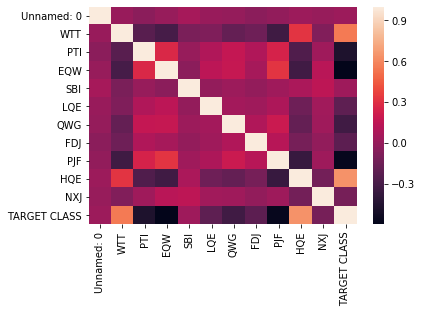

In [10]:
sns.heatmap(df.corr())

In [5]:
X=pd.DataFrame(scaled_Array,columns=df.columns[:-1])

In [ ]:
### Here we can observe that EQW and PJF has no relation with y=target class ###HQE,WTT highly related

In [6]:
y=df['TARGET CLASS']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [ ]:
#X.drop(['EQW','PJF'],axis=1,inplace=True)

In [9]:
y.head()

0    1
1    0
2    0
3    1
4    1
Name: TARGET CLASS, dtype: int64

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [13]:
X_train.shape

(700, 11)

In [14]:
X_test.shape

(300, 11)

In [15]:
y_train.shape

(700,)

In [16]:
y_test.shape

(300,)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Unnamed: 0      1000 non-null int64
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(2)
memory usage: 93.8 KB


In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn=KNeighborsClassifier(n_neighbors=1) ####n_neighbors=1 or =all set doesnt give accurate result

In [72]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [73]:
ypred=knn.predict(X_test)

In [74]:
import numpy as np

In [75]:
np.mean(y_test!=ypred)  # giving error mean # should be as less as possible with change in value of n_neighbor)

0.10666666666666667

In [76]:
np.mean(y_test==ypred) # giving accuracy , should be as close to 1 as possible for higher accuracy

0.8933333333333333

In [88]:
err_list1=[]
for i in range(1,51):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    ypred=knn.predict(X_test)
    err_list1.append(np.mean(y_test!=ypred))
    #print(f'i is {i} and value is {x}')


In [89]:
import matplotlib.pyplot as plt

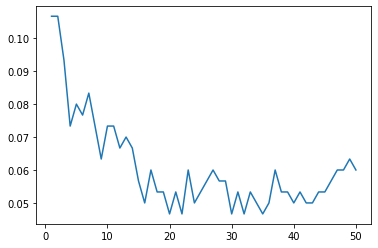

In [90]:
plt.plot(range(1,51),err_list1)

In [94]:
from sklearn.metrics import confusion_matrix

In [95]:
knn=KNeighborsClassifier(n_neighbors=20)

In [96]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [97]:
ypred=knn.predict(X_test)

In [98]:
confusion_matrix(y_test,ypred)

array([[133,   9],
       [  5, 153]], dtype=int64)

In [99]:
14/286##########same value on 20th index###min error value

0.04895104895104895